In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

## Sensitivity: Random Seed (1000 runs)

Median:  209.8458557443464 Mean:  211.6567590113207


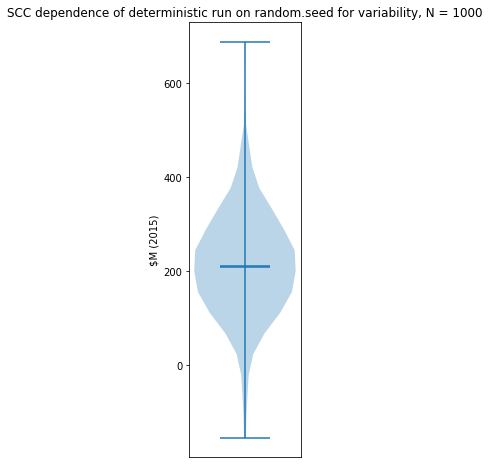

In [15]:
df = pd.read_csv("RandomSeedSensitivity\page-var\df_varmultiplier.csv")
data = df['SCC_2020'].values
median = np.median(df['SCC_2020'].values)
mean = np.mean(df['SCC_2020'].values)
N = 1000
pos = range(1)
fig, axes = plt.subplots()
fig.set_size_inches(2, 8)
plt.xticks([], [])

# plt.yscale('log')
plt.ylabel('$M (2015)')
axes.violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes.set_title('SCC dependence of deterministic run on random.seed for variability, N = '+ str(N))
print("Median: ", median, "Mean: ", mean)

## Sensitivity: variability multiplier

#### for 1 Random Seed

Text(0.5,1,'SCC dependence for one randomseed for variability multiplier')

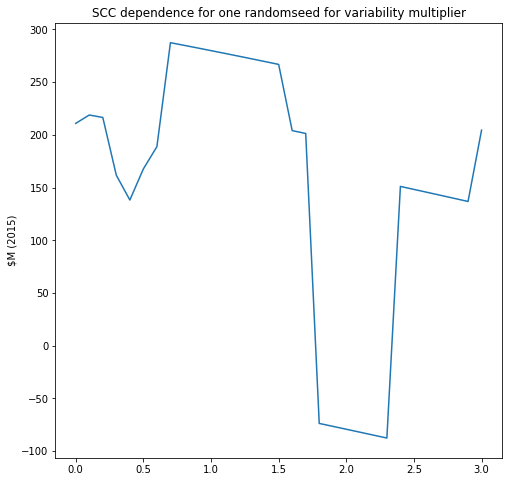

In [16]:
df = pd.read_csv("VarSensitivityTests\deterministic\df_varmultiplier.csv")
data = df['SCC_2020'].values
x = np.linspace(0., 3., 31)
N = 1000
pos = range(1)
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

# plt.yscale('log')
plt.ylabel('$M (2015)')
plt.plot(x,data)
axes.set_title('SCC dependence for one randomseed for variability multiplier')

#### for 100 Random Seeds

Text(0.5,1,'Mean SCC values for 100 random seeds per var_multiplier with their standard deviation')

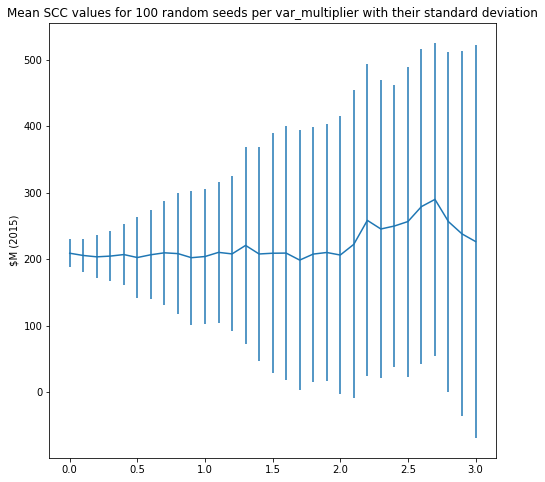

In [20]:
df = pd.read_csv("RandomSeedSensitivity_Determinstic_Combo\page-var\df_varmultiplier.csv")
data = df['mean_SCC'].values
data_sd = df['sd_SCC'].values
x = np.linspace(0., 3., 31)
N = 100
pos = range(1)
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

# plt.yscale('log')
plt.ylabel('$M (2015)')
plt.errorbar(x,data,data_sd)
axes.set_title('Mean SCC values for 100 random seeds per var_multiplier with their standard deviation')

## August 6 version: ICE vs ANN vs VAR
## ------ 
##  for onlyvar, novar, fullMC

#### SCC
Read in the montecarlo SCC output files 

In [29]:
df_ice_onlyvar = genfromtxt("ICEANNVARmcAugust_onlyvarMC\page-ice\scc.csv", delimiter=',')
df_ice_novar = genfromtxt("ICEANNVARmcAugust_novarMC\page-ice\scc.csv", delimiter=',')
df_ice_fullMC = genfromtxt("ICEANNVARmcAugust_fullMC\page-ice\scc.csv", delimiter=',')
df_ann_onlyvar = genfromtxt("ICEANNVARmcAugust_onlyvarMC\page-ann\scc.csv", delimiter=',')
df_ann_novar = genfromtxt("ICEANNVARmcAugust_novarMC\page-ann\scc.csv", delimiter=',')
df_ann_fullMC = genfromtxt("ICEANNVARmcAugust_fullMC\page-ann\scc.csv", delimiter=',')
df_var_onlyvar = genfromtxt("ICEANNVARmcAugust_onlyvarMC\page-var\scc.csv", delimiter=',')
df_var_novar = genfromtxt("ICEANNVARmcAugust_novarMC\page-var\scc.csv", delimiter=',')
df_var_fullMC = genfromtxt("ICEANNVARmcAugust_fullMC\page-var\scc.csv", delimiter=',')


In [32]:
scc_array = np.array([[df_ice_onlyvar, df_ann_onlyvar, df_var_onlyvar],
          [df_ice_novar, df_ann_novar, df_var_novar],
          [df_ice_fullMC, df_ann_fullMC, df_var_fullMC]])
print(scc_array.shape)

(3, 3, 200)


[Text(0,0,'PAGE-ICE'), Text(0,0,'PAGE-ANN'), Text(0,0,'PAGE-VAR')]

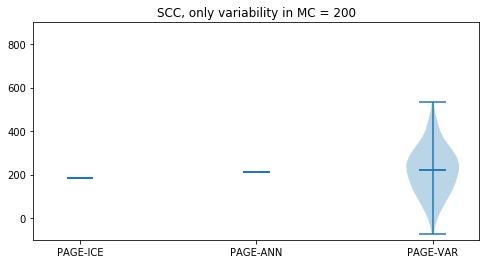

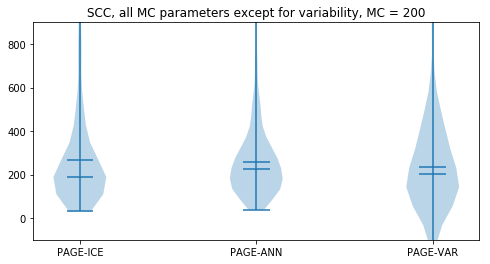

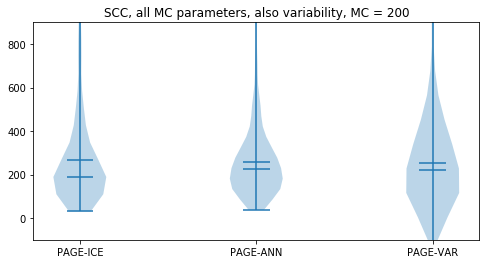

In [38]:
MCruns = scc_array.shape[2]
pos = range(scc_array.shape[1])

######### onlyvar
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# plt.yscale('log')
plt.ylim((-100,900))
ax.violinplot(np.transpose(scc_array[0]), pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
ax.set_title('SCC, only variability in MC = ' + str(MCruns))
ax.set_xticks([0,1,2])
ax.set_xticklabels(['PAGE-ICE','PAGE-ANN','PAGE-VAR'])
print("Median: ", np.median(scc_array[0]), "Mean: ", np.mean(scc_array[0]))

######### novar
fig1, ax = plt.subplots()
fig1.set_size_inches(8, 4)
# plt.yscale('log')
plt.ylim((-100,900))
ax.violinplot(np.transpose(scc_array[1]), pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
ax.set_title('SCC, all MC parameters except for variability, MC = ' + str(MCruns))
ax.set_xticks([0,1,2])
ax.set_xticklabels(['PAGE-ICE','PAGE-ANN','PAGE-VAR'])

######### fullMC
fig2, ax = plt.subplots()
fig2.set_size_inches(8, 4)
# plt.yscale('log')
plt.ylim((-100,900))
ax.violinplot(np.transpose(scc_array[2]), pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
ax.set_title('SCC, all MC parameters, also variability, MC = ' + str(MCruns))
ax.set_xticks([0,1,2])
ax.set_xticklabels(['PAGE-ICE','PAGE-ANN','PAGE-VAR'])

## Old(er) analysis below, saved for reference

## ICE vs ANN vs VAR

#### Model variables
Read in the montecarlo output files 

In [40]:
df_ice = pd.read_csv("mcPAGEICE\mimipagemontecarlooutput.csv")
df_ann = pd.read_csv("mcPAGEANN\mimipagemontecarlooutput.csv")
df_var = pd.read_csv("mcPAGEVAR\mimipagemontecarlooutput.csv")

print("mean values:")
print(np.mean(df_ice['td'].values), np.mean(df_ann['td_ann'].values), np.mean(df_var['td_ann'].values))
print("ICE < ANN = ", np.mean(df_ice['td'].values) < np.mean(df_ann['td_ann'].values))
print("ANN < VAR = ", np.mean(df_ann['td_ann'].values) < np.mean(df_var['td_ann'].values))

print("max values:")
print(max(df_ice['td'].values), max(df_ann['td_ann'].values), max(df_var['td_ann'].values))
print("ICE < ANN = ", max(df_ice['td'].values) < max(df_ann['td_ann'].values))
print("ANN < VAR = ", max(df_ann['td_ann'].values) < max(df_var['td_ann'].values))

mean values:
1374780760.8412511 1384922524.2175016 1400380508.195968
ICE < ANN =  True
ANN < VAR =  True
max values:
20123749254.935238 20286562313.545315 18267488750.411568
ICE < ANN =  True
ANN < VAR =  False


In [41]:
df_ice.head()

,td,tpc,tac,te,c_co2concentration,ft,rt_g,sealevel,rgdppercap_slr,rgdppercap_market,rgdppercap_nonmarket,rconspercap_di,td_ann,rconspercap_di_ann,occurdis_occurrencedummy_sum,occurdis_occurrencedummy_ann_sum
0,1.221770e+09,-5.141083e+07,2.329148e+06,1.172688e+09,758867.815720,7.002922,5.286635,3.893625,254248.547573,241929.731070,233929.442102,195480.969461,1.246438e+09,5.534822e+06,7.0,252.0
1,5.088148e+08,-3.369053e+07,3.464452e+06,4.785887e+08,753343.724890,6.962739,2.935939,1.952712,255756.969959,252160.349813,251118.459683,211462.797253,5.138163e+08,6.074603e+06,0.0,0.0
2,2.138352e+09,-8.473483e+07,6.176270e+06,2.059794e+09,654590.614815,6.189925,4.737460,2.046055,256809.585891,249651.090079,246139.690678,204144.118173,2.234966e+09,5.745919e+06,8.0,270.0
3,1.853380e+09,5.578501e+07,6.847565e+06,1.916013e+09,719809.497201,6.712296,4.673582,1.854691,256743.792755,246103.218524,241350.918889,208963.110153,1.925047e+09,5.999402e+06,4.0,191.0
4,1.347681e+09,-2.471144e+07,3.720156e+06,1.326689e+09,692018.237699,6.495738,4.582120,2.471303,256339.195157,247236.716643,239645.162302,199402.729351,1.346461e+09,5.518543e+06,0.0,0.0


In [42]:
variables = [['td','td_ann'], ['rconspercap_di', 'rconspercap_di_ann'], ['occurdis_occurrencedummy_sum','occurdis_occurrencedummy_ann_sum']]

In [43]:
i = 0
ar_variables = np.zeros((len(variables), 3, len(df_ice)))
for v in variables:
    print(v[0], v[1])
    ar_variables[i,:] = np.array([df_ice[v[1]].values,
                        df_ann[v[1]].values,
                        df_var[v[1]].values])
    i = i + 1
    
ar_variables.shape

td td_ann
rconspercap_di rconspercap_di_ann
occurdis_occurrencedummy_sum occurdis_occurrencedummy_ann_sum


(3, 3, 10000)

For subplots of simple violin plots, see e.g. https://matplotlib.org/3.1.0/gallery/statistics/violinplot.html
For logarithmic plotting: https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#logarithmic-and-other-nonlinear-axes

In [44]:
# total discounted impacts
MCruns = ar_variables.shape[2]
pos = range(ar_td.shape[0])
fig, axes = plt.subplots()
plt.yscale('log')
plt.ylabel('$M (2015)')
axes.violinplot(np.transpose(ar_variables[0]), pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes.set_title('A violinplot of Total Discounted impacts (means and medians), MC = '+ str(MCruns))
axes.set_xticks([0,1,2])
axes.set_xticklabels(['PAGE-ICE','PAGE-ANN','PAGE-VAR'])


# Discontintuity
pos = range(ar_td.shape[0])
fig, axes = plt.subplots()
# plt.yscale('log')
plt.ylabel('$M (2015)')
plt.ylim((4000000,7000000))
axes.violinplot(np.transpose(ar_variables[1]), pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes.set_title('A violinplot of Total Discontinuity Consumption remain (means and medians), MC = '+ str(MCruns))
axes.set_xticks([0,1,2])
axes.set_xticklabels(['PAGE-ICE','PAGE-ANN','PAGE-VAR'])

# Discontintuity
pos = range(ar_td.shape[0])
fig, axes = plt.subplots()
plt.ylabel('Number of Days')
axes.violinplot(np.transpose(ar_variables[2]), pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes.set_title('A violinplot of Total Years with Dicontinuity Triggered(means and medians), MC = '+ str(MCruns))
axes.set_xticks([0,1,2])
axes.set_xticklabels(['PAGE-ICE','PAGE-ANN','PAGE-VAR'])

print("mean values occurdis:")
print(np.mean(df_ice['occurdis_occurrencedummy_sum'].values),'(* timesteps)', np.mean(df_ann['occurdis_occurrencedummy_ann_sum'].values),'years', np.mean(df_var['occurdis_occurrencedummy_ann_sum'].values),'years')
print("ICE < ANN = ", np.mean(df_ice['occurdis_occurrencedummy_sum'].values) < np.mean(df_ann['occurdis_occurrencedummy_ann_sum'].values))
print("ANN < VAR = ", np.mean(df_ann['occurdis_occurrencedummy_ann_sum'].values) < np.mean(df_var['occurdis_occurrencedummy_ann_sum'].values))

NameError: name 'ar_td' is not defined

#### Social Cost of Carbon
Reading in the results from montecarlo outputs

In [2]:
ice_scc = genfromtxt('mcPAGEICE\scc\scc.csv', delimiter=',')
ann_scc = genfromtxt('mcPAGEANN\scc\scc.csv', delimiter=',')
var_scc = genfromtxt('mcPAGEVAR\scc\scc.csv', delimiter=',')

print("median values:")
print(np.median(ice_scc), np.median(ann_scc), np.median(var_scc))
print("ICE < ANN = ", np.median(ice_scc) < np.median(ann_scc))
print("ANN < VAR = ", np.median(ann_scc) < np.median(var_scc))

print("mean values:")
print(np.mean(ice_scc), np.mean(ann_scc), np.mean(var_scc))
print("ICE < ANN = ", np.mean(ice_scc) < np.mean(ann_scc))
print("ANN < VAR = ", np.mean(ann_scc) < np.mean(var_scc))

print("max values:")
print(max(ice_scc), max(ann_scc), max(var_scc))
print("ICE < ANN = ", max(ice_scc) < max(ann_scc))
print("ANN < VAR = ", max(ann_scc) < max(var_scc))

median values:
201.42125208354236 226.0041199589312 219.05935901574492
ICE < ANN =  True
ANN < VAR =  False
mean values:
271.53117111874616 273.4658615365835 271.38716066729353
ICE < ANN =  True
ANN < VAR =  False
max values:
3740.8580233368302 2399.619410792999 2788.1308395331384
ICE < ANN =  False
ANN < VAR =  True


In [3]:
ar_scc = np.array([ice_scc,
                    ann_scc,
                    var_scc])
    
ar_scc.shape

(3, 10000)

[Text(0,0,'PAGE-ICE'), Text(0,0,'PAGE-ANN'), Text(0,0,'PAGE-VAR')]

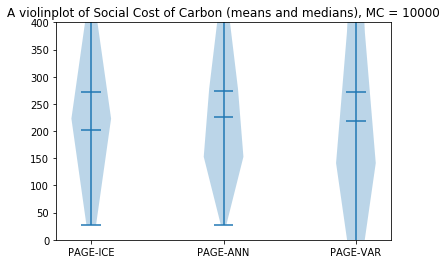

In [9]:
MCruns = ar_scc.shape[1]
pos = range(ar_scc.shape[0])
fig1, ax = plt.subplots()
# plt.yscale('log')
plt.ylim((0,400))
ax.violinplot(np.transpose(ar_scc), pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
ax.set_title('A violinplot of Social Cost of Carbon (means and medians), MC = ' + str(MCruns))
ax.set_xticks([0,1,2])
ax.set_xticklabels(['PAGE-ICE','PAGE-ANN','PAGE-VAR'])

## Comparing different scenarios

#### Social Cost of Carbon - with uncertainty in only the var_multiplier parameters
Reading in the results from montecarlo outputs

In [63]:
# scenarios I would also like to do: ["1_5C", "2_0C",]
scenarios = ["2_5C", "NDC", "BAU", "RCP2_6_SSP1", "RCP4_5_SSP2", "RCP8_5_SSP5"]
mcruns = 500
scc_sc = np.zeros((len(scenarios),mcruns)) # 8 scenarios, 100 mc runs per scenario
i = 0
for sc in scenarios:
    
    path = "mcPAGEVAR\onlyvarMC\%s\scc.csv" % (sc)
    data = genfromtxt(path, delimiter=',')
    scc_sc[i] = data
    
    i = i + 1


,Scenario,SCC mean,SCC median,SCC min,SCC max
0,2_5C,159.908980,158.731887,62.469132,264.650437
1,NDC,223.298480,227.612104,-155.273359,541.088482
2,BAU,195.175260,199.094652,-122.602994,446.644318
3,RCP2_6_SSP1,139.351510,138.785764,48.296271,227.318542
4,RCP4_5_SSP2,269.507761,267.105863,-526.727598,795.392376


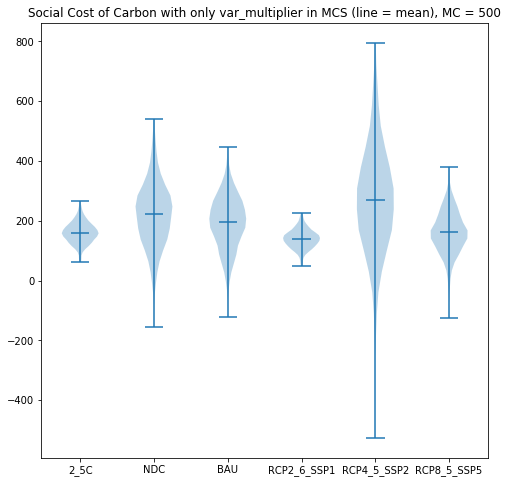

In [64]:
MCruns = mcruns
pos = range(len(scenarios))
fig2, axs = plt.subplots()
fig2.set_size_inches(8, 8)
# plt.yscale('log')
axs.violinplot(np.transpose(scc_sc), pos, points=20, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=False)
axs.set_title('Social Cost of Carbon with only var_multiplier in MCS (line = mean), MC = '+ str(MCruns))
axs.set_xticks(range(len(scenarios)))
axs.set_xticklabels(scenarios)

df = pd.DataFrame(columns=['Scenario', 'SCC mean', 'SCC median', 'SCC min', 'SCC max'])

for i in range(len(scenarios)):
    df.loc[i] = (scenarios[i], np.mean(scc_sc[i]), np.median(scc_sc[i]), np.min(scc_sc[i]), np.max(scc_sc[i]))
    
df.head()

#### Social Cost of Carbon - with MC uncertainty in all but the variability parameters
Reading in the results from montecarlo outputs

In [23]:
# scenarios I would also like to do: ["1_5C", "2_0C",]
scenarios = ["2_5C", "NDC", "BAU", "RCP2_6_SSP1", "RCP4_5_SSP2", "RCP8_5_SSP5"]
mcruns = 500
scc_sc = np.zeros((len(scenarios),mcruns)) # 8 scenarios, 100 mc runs per scenario
i = 0
for sc in scenarios:
    
    path = "mcPAGEVAR\MCscenariosNoVarInMC\%s\scc.csv" % (sc)
    data = genfromtxt(path, delimiter=',')
    scc_sc[i] = data
    
    i = i + 1


,Scenario,SCC mean,SCC median,SCC min,SCC max
0,2_5C,231.771644,169.648388,-782.425336,1735.717481
1,NDC,272.928224,212.385989,-794.858466,2005.328408
2,BAU,257.919058,195.363178,-654.923169,2042.125687
3,RCP2_6_SSP1,203.380018,145.580506,-2913.972202,3075.595350
4,RCP4_5_SSP2,303.598667,233.628740,-830.242274,2415.152128


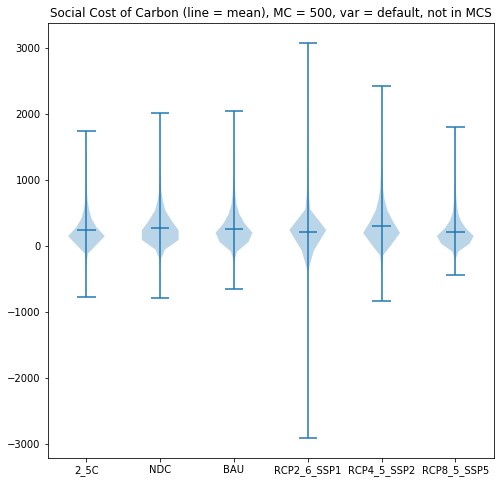

In [24]:
MCruns = mcruns
pos = range(len(scenarios))
fig2, axs = plt.subplots()
fig2.set_size_inches(8, 8)
# plt.yscale('log')
axs.violinplot(np.transpose(scc_sc), pos, points=20, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=False)
axs.set_title('Social Cost of Carbon (line = mean), MC = '+ str(MCruns)', var = default, not in MCS')
axs.set_xticks(range(len(scenarios)))
axs.set_xticklabels(scenarios)

df = pd.DataFrame(columns=['Scenario', 'SCC mean', 'SCC median', 'SCC min', 'SCC max'])

for i in range(len(scenarios)):
    df.loc[i] = (scenarios[i], np.mean(scc_sc[i]), np.median(scc_sc[i]), np.min(scc_sc[i]), np.max(scc_sc[i]))
    
df.head()